In [1]:
%matplotlib inline
import sqlite3
conn = sqlite3.connect('projet3.db')
c = conn.cursor()

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# load the data into a Pandas DataFrame
population = pd.read_csv("population.csv")
sousalimentation_pays = pd.read_csv("sous_alimentation.csv")
dispo_alim = pd.read_csv("dispo_alim.csv")
equilibre_prod = pd.read_csv("equilibre_prod.csv")


In [3]:
population.to_sql('population', conn, if_exists='replace', index = False)

In [4]:
dispo_alim.to_sql('dispo_alim', conn, if_exists='replace', index = False)

In [5]:
equilibre_prod.to_sql('equilibre_prod', conn, if_exists='replace', index = False)

In [6]:
sousalimentation_pays.to_sql('sous_nutrition', conn, if_exists='replace', index = False)

Trouver les 10 pays ayant le plus haut ratio disponibilité alimentaire/habitant en termes de protéines (en kg) par habitant.

In [7]:
table_hautRatio_kgprot=pd.read_sql_query(""" SELECT pays, ROUND(sum(dispo_prot*365*0.001),2) as ratio_kg_habitant 
                        From dispo_alim   
                        GROUP BY dispo_alim.pays 
                        ORDER BY ratio_kg_habitant DESC Limit 10"""
                  , con = conn)

In [8]:
table_hautRatio_kgprot

,pays,ratio_kg_habitant
0,Islande,48.57
1,Israël,46.72
2,Lituanie,45.39
3,Maldives,44.65
4,Finlande,42.91
5,Luxembourg,41.48
6,Monténégro,40.84
7,Pays-Bas,40.68
8,Albanie,40.65
9,Portugal,40.47


Trouver les 10 pays ayant le plus haut ratio disponibilité alimentaire/habitant en termes de kcal par habitant

In [9]:
pd.read_sql_query(""" SELECT pays, ROUND(sum(dispo_alim_kcal_p_j*365), 2) as ratio_kcal_habitant 
                        FROM dispo_alim
                        GROUP BY pays 
                        ORDER BY ratio_kcal_habitant DESC Limit 10"""
                  , con = conn)

,pays,ratio_kcal_habitant
0,Autriche,1376050.0
1,Belgique,1364005.0
2,Turquie,1353420.0
3,États-Unis d'Amérique,1343930.0
4,Israël,1317650.0
5,Irlande,1314730.0
6,Italie,1305970.0
7,Luxembourg,1292100.0
8,Égypte,1284070.0
9,Allemagne,1278595.0


Pour l'année 2013, les 10 pays ayant le plus faible ratio disponibilité alimentaire/habitant en termes de protéines (en kg) par habitant.


In [10]:
pd.read_sql_query(""" SELECT pays, ROUND(sum(dispo_prot*365*0.001), 2) as ratio_kg_habitant 
                        FROM dispo_alim 
                        GROUP BY pays 
                        ORDER BY ratio_kg_habitant ASC Limit 10"""
                  , con = conn)

,pays,ratio_kg_habitant
0,Libéria,13.75
1,Guinée-Bissau,16.08
2,Mozambique,16.67
3,République centrafricaine,16.80
4,Madagascar,17.04
5,Haïti,17.41
6,Zimbabwe,17.64
7,Congo,18.76
8,Ouganda,19.21
9,Sao Tomé-et-Principe,19.38


La quantité totale (en kg) de produits perdus par pays en 2013.

In [11]:
pd.read_sql_query(""" SELECT pays,sum(pertes)as pertes_totales
                        FROM equilibre_prod 
                        where annee = '2013'
                        GROUP BY pays """
                  , con = conn)

,pays,pertes_totales
0,Afghanistan,1.135000e+09
1,Afrique du Sud,2.193000e+09
2,Albanie,2.760000e+08
3,Algérie,3.753000e+09
4,Allemagne,3.781000e+09
...,...,...
166,Émirats arabes unis,7.050000e+08
167,Équateur,7.070000e+08
168,États-Unis d'Amérique,7.162000e+09
169,Éthiopie,2.256000e+09


Les 10 pays pour lesquels la proportion de personnes sous-alimentées est la plus forte.

In [12]:
pays_sous_alimente = pd.read_sql_query(""" SELECT population.pays, round((nb_personnes/population)*100, 2) as proportion 
                        from sous_nutrition 
                        join population on sous_nutrition.pays = population.pays 
                        order by proportion DESC LIMIT 10"""
                  , con = conn)

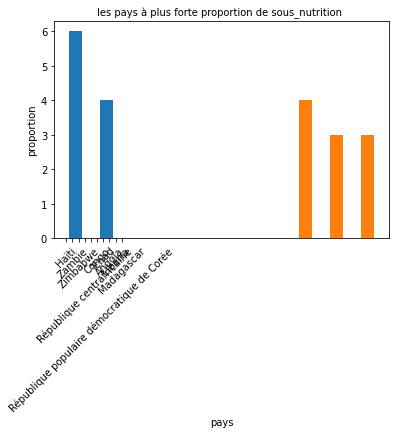

In [13]:
plt.hist(pays_sous_alimente)
plt.xlabel("pays")
plt.ylabel("proportion")
plt.title('les pays à plus forte proportion de sous_nutrition ', fontsize=10)
plt.xticks(rotation=45)

plt.savefig("pays dont la proportion de sous_nutrition est plus forte .png")

plt.show()

Les 10 produits pour lesquels le ratio Autres utilisations/Disponibilité intérieure est le plus élevé.

In [14]:
pd.read_sql_query(""" SELECT produit , AVG(autres_utilisations/dispo_int) as ratio_uti_dispo 
                        from equilibre_prod 
                        GROUP BY produit order by ratio_uti_dispo DESC LIMIT 10"""
                  , con = conn)

,produit,ratio_uti_dispo
0,"Alcool, non Comestible",0.981982
1,Plantes Aquatiques,0.918852
2,Huile de Palmistes,0.783431
3,Piments,0.739130
4,Huile de Palme,0.650285
5,Huile de Colza&Moutarde,0.618201
6,Huile de Coco,0.567152
7,Huil Plantes Oleif Autr,0.553192
8,Palmistes,0.531346
9,Huile de Son de Riz,0.502955


In [15]:
conn.close()